# 1) Bibliotecas

In [60]:
import warnings
#--------------------------------------------------------
import pandas as pd
import numpy as np
#--------------------------------------------------------
#Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree as tr
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#--------------------------------------------------------
from sklearn import metrics as mt
from sklearn.metrics import precision_recall_curve
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#----------------------------
import matplotlib.pyplot as plt
#----------------------------
warnings.filterwarnings( 'ignore' )

# 2) Conjunto de dados

In [43]:
x_train = pd.read_csv('datasets/classificacao/X_training.csv')
y_train = pd.read_csv('datasets/classificacao/y_training.csv')
y_train2 = y_train['0'].values
#----------------------------------------------------------------------
x_val = pd.read_csv('datasets/classificacao/X_validation.csv')
y_val = pd.read_csv('datasets/classificacao/y_validation.csv')
y_val2 = y_val['0'].values
#----------------------------------------------------------------------
x_test = pd.read_csv('datasets/classificacao/X_test.csv')
y_test = pd.read_csv('datasets/classificacao/y_test.csv')
y_test2 = y_test['0'].values
#----------------------------------------------------------------------
total = x_train.shape[0] + x_val.shape[0] + x_test.shape[0]
#----------------------------------------------------------------------
print('Treino: {} instâncias / {}%'.format(x_train.shape[0], round(100*(x_train.shape[0]/total))))
print('Validação: {} instâncias / {}%'.format(x_val.shape[0], round(100*(x_val.shape[0]/total))))
print('Teste: {} instâncias  / {}%'.format(x_test.shape[0], round(100*(x_test.shape[0]/total))))
print('Total: {} instâncias'.format(total))

Treino: 72515 instâncias / 56%
Validação: 31079 instâncias / 24%
Teste: 25893 instâncias  / 20%
Total: 129487 instâncias


# 3) Algoritmo - K-Neighbors Classifier (KNN)

## 3.1) Ajuste inicial do modelo KNN (k = 5) - previsão sobre x_train

In [3]:
#Selecionar o modelo de aprendizado de máquina

knn_model = KNeighborsClassifier(n_neighbors = 5)

#Ajustar os dados ao modelo
knn_model.fit(x_train, y_train2)

#Predizer
y_pred = knn_model.predict(x_train)
y_pred_proba = knn_model.predict_proba(x_train)[:,1] #Coluna 1 das predições: Classe positiva (Classe 1). Threshold = 0.6 para classificação

#Descobrindo o limiar de decisão (threshold)
y_train3 = y_train.copy()
y_train3['predito'] = y_pred
y_train3['proba'] = y_pred_proba
y_train3.columns = ['real', 'predito', 'proba']

th = y_train3[['predito', 'proba']].groupby('predito').min().iloc[1,0] #Limiar de decisão: 0.6
                                                                       #Objetivo dessa operação: descobrir a partir de qual probabilidade, o algoritmo classificou como classe positiva (1)

#Métricas de performance
matriz1   = mt.confusion_matrix(y_train2, y_pred, labels = knn_model.classes_)
acuracia1 = round(mt.accuracy_score(y_train2, y_pred), 3)
precisao1 = round(mt.precision_score(y_train2, y_pred), 3)
recall1   = round(mt.recall_score(y_train2, y_pred), 3)
f1_score1 = round(mt.f1_score(y_train2, y_pred), 3)

### 3.1.1) Matriz de confusão (k = 5)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


<Figure size 640x480 with 0 Axes>

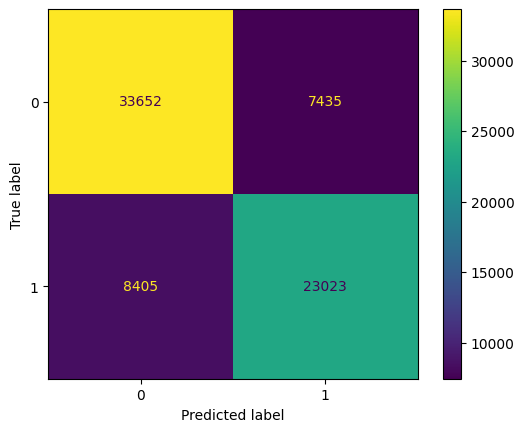

In [4]:
disp = mt.ConfusionMatrixDisplay(confusion_matrix = matriz1, display_labels = knn_model.classes_)
plt.savefig('disp.jpg', format = 'jpeg')
disp.plot()

### 3.1.2) Construindo o dataframe e plots - para diferentes limiares de decisão

In [5]:
#Efetuando classificações com diferentes limiares de decisão
y_train3['classe_00'] = y_train3['proba'].apply(lambda x: 'Classe_Positiva' if x >= 0.0 else 'Classe_Negativa')
y_train3['classe_01'] = y_train3['proba'].apply(lambda x: 'Classe_Positiva' if x >= 0.1 else 'Classe_Negativa')
y_train3['classe_02'] = y_train3['proba'].apply(lambda x: 'Classe_Positiva' if x >= 0.2 else 'Classe_Negativa')
y_train3['classe_04'] = y_train3['proba'].apply(lambda x: 'Classe_Positiva' if x >= 0.4 else 'Classe_Negativa')
y_train3['classe_06'] = y_train3['proba'].apply(lambda x: 'Classe_Positiva' if x >= 0.6 else 'Classe_Negativa')
y_train3['classe_08'] = y_train3['proba'].apply(lambda x: 'Classe_Positiva' if x >= 0.8 else 'Classe_Negativa') 
y_train3['classe_09'] = y_train3['proba'].apply(lambda x: 'Classe_Positiva' if x >= 0.9 else 'Classe_Negativa')
y_train3['classe_10'] = y_train3['proba'].apply(lambda x: 'Classe_Positiva' if x >= 1.0 else 'Classe_Negativa')
#---------------------------------------------------------------------------------------------------------
matriz_00 = y_train3[['real', 'classe_00', 'predito']].groupby(['real', 'classe_00']).count().reset_index()
matriz_01 = y_train3[['real', 'classe_01', 'predito']].groupby(['real', 'classe_01']).count().reset_index()
matriz_02 = y_train3[['real', 'classe_02', 'predito']].groupby(['real', 'classe_02']).count().reset_index()
matriz_04 = y_train3[['real', 'classe_04', 'predito']].groupby(['real', 'classe_04']).count().reset_index()
matriz_06 = y_train3[['real', 'classe_06', 'predito']].groupby(['real', 'classe_06']).count().reset_index()
matriz_08 = y_train3[['real', 'classe_08', 'predito']].groupby(['real', 'classe_08']).count().reset_index()
matriz_09 = y_train3[['real', 'classe_09', 'predito']].groupby(['real', 'classe_09']).count().reset_index()
matriz_10 = y_train3[['real', 'classe_10', 'predito']].groupby(['real', 'classe_10']).count().reset_index()
#---------------------------------------------------------------------------------------------------------
#Cálculo manual das métricas
acuracia_00 = 100*round((0 + matriz_00.iloc[1,2])/matriz_00['predito'].sum(),4)
acuracia_01 = 100*round((matriz_01.iloc[0,2] + matriz_01.iloc[2,2])/matriz_01['predito'].sum(),4)
acuracia_02 = 100*round((matriz_02.iloc[0,2] + matriz_02.iloc[2,2])/matriz_02['predito'].sum(),4)
acuracia_04 = 100*round((matriz_04.iloc[0,2] + matriz_04.iloc[3,2])/matriz_04['predito'].sum(),4)
acuracia_06 = 100*round((matriz_06.iloc[0,2] + matriz_06.iloc[3,2])/matriz_06['predito'].sum(),4)
acuracia_08 = 100*round((matriz_08.iloc[0,2] + matriz_08.iloc[3,2])/matriz_08['predito'].sum(),4)
acuracia_09 = 100*round((matriz_09.iloc[0,2] + matriz_09.iloc[2,2])/matriz_09['predito'].sum(),4)
acuracia_10 = 100*round((matriz_10.iloc[0,2] + matriz_10.iloc[2,2])/matriz_10['predito'].sum(),4)
#---------------------------------------------------------------------------------------------------------
precisao_00 = 100*round((matriz_00.iloc[1,2])/(matriz_00.iloc[0,2] + matriz_00.iloc[1,2]),4)
precisao_01 = 100*round((matriz_01.iloc[2,2])/(matriz_01.iloc[1,2] + matriz_01.iloc[2,2]),4)
precisao_02 = 100*round((matriz_02.iloc[2,2])/(matriz_02.iloc[1,2] + matriz_02.iloc[2,2]),4)
precisao_04 = 100*round((matriz_04.iloc[3,2])/(matriz_04.iloc[1,2] + matriz_04.iloc[3,2]),4)
precisao_06 = 100*round((matriz_06.iloc[3,2])/(matriz_06.iloc[1,2] + matriz_06.iloc[3,2]),4)
precisao_08 = 100*round((matriz_08.iloc[3,2])/(matriz_08.iloc[1,2] + matriz_08.iloc[3,2]),4)
precisao_09 = 100*round((matriz_09.iloc[2,2])/(0 + matriz_09.iloc[2,2]),4)
precisao_10 = 100*round((matriz_10.iloc[2,2])/(0 + matriz_10.iloc[2,2]),4)
#---------------------------------------------------------------------------------------------------------
recall_00 = 100*round((matriz_00.iloc[1,2])/(0 + matriz_00.iloc[1,2]),3)
recall_01 = 100*round((matriz_01.iloc[2,2])/(0 + matriz_01.iloc[2,2]),3)
recall_02 = 100*round((matriz_02.iloc[2,2])/(0 + matriz_02.iloc[2,2]),3)
recall_04 = 100*round((matriz_04.iloc[3,2])/(matriz_04.iloc[2,2] + matriz_04.iloc[3,2]),3)
recall_06 = 100*round((matriz_06.iloc[3,2])/(matriz_06.iloc[2,2] + matriz_06.iloc[3,2]),3)
recall_08 = 100*round((matriz_08.iloc[3,2])/(matriz_08.iloc[2,2] + matriz_08.iloc[3,2]),3)
recall_09 = 100*round((matriz_09.iloc[2,2])/(matriz_09.iloc[1,2] + matriz_09.iloc[2,2]),3)
recall_10 = 100*round((matriz_10.iloc[2,2])/(matriz_10.iloc[1,2] + matriz_10.iloc[2,2]),3)
#---------------------------------------------------------------------------------------------------------
#FPR - false positive ratio
fpr_00 = 100*round((matriz_00.iloc[0,2])/(0 + matriz_00.iloc[0,2]),3)
fpr_01 = 100*round((matriz_01.iloc[1,2])/(matriz_01.iloc[1,2] + matriz_01.iloc[0,2]),3)
fpr_02 = 100*round((matriz_02.iloc[1,2])/(matriz_02.iloc[0,2] + matriz_02.iloc[1,2]),3)
fpr_04 = 100*round((matriz_04.iloc[1,2])/(matriz_04.iloc[0,2] + matriz_04.iloc[1,2]),3)
fpr_06 = 100*round((matriz_06.iloc[1,2])/(matriz_06.iloc[0,2] + matriz_06.iloc[1,2]),3)
fpr_08 = 100*round((matriz_08.iloc[1,2])/(matriz_08.iloc[0,2] + matriz_08.iloc[1,2]),3)
fpr_09 = 100*round((0)/(matriz_09.iloc[0,2] + 0),3)
fpr_10 = 100*round((0)/(matriz_10.iloc[0,2] + 0),3)
#---------------------------------------------------------------------------------------------------------
df = pd.DataFrame.from_dict({'Limiar': [0, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 1.0],
                            'Acurácia': [acuracia_00, acuracia_01, acuracia_02, acuracia_04, acuracia_06, acuracia_08, acuracia_09, acuracia_10],
                            'Precisão': [precisao_00, precisao_01, precisao_02, precisao_04, precisao_06, precisao_08, precisao_09, precisao_10],
                            'Recall':   [recall_00, recall_01, recall_02, recall_04, recall_06, recall_08, recall_09, recall_10],
                            'FPR': [fpr_00, fpr_01, fpr_02, fpr_04, fpr_06, fpr_08, fpr_09, fpr_10]
                            }
                           )
df

,Limiar,Acurácia,Precisão,Recall,FPR
0,0.0,43.34,43.34,100.0,100.0
1,0.1,60.68,52.43,100.0,69.4
2,0.2,60.68,52.43,100.0,69.4
3,0.4,73.72,63.65,91.8,40.1
4,0.6,78.16,75.59,73.3,18.1
5,0.8,73.75,88.05,45.6,4.7
6,0.9,64.20,100.00,17.4,0.0
7,1.0,64.20,100.00,17.4,0.0


### 3.1.3) Plot de visualização da relação Precisão vs. Recall

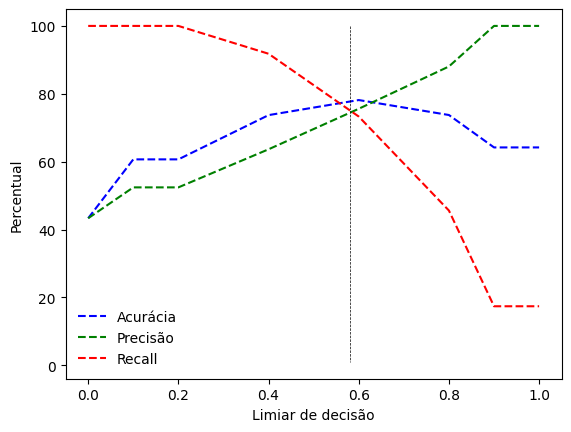

In [6]:
plt.plot(df['Limiar'], df['Acurácia'], 'b--', label = 'Acurácia')
plt.plot(df['Limiar'], df['Precisão'], 'g--', label = 'Precisão') #A precisão da classe positiva aumenta com aumento do limiar de decisão
plt.plot(df['Limiar'], df['Recall'], 'r--', label = 'Recall')
plt.xlabel('Limiar de decisão')
plt.ylabel('Percentual')
plt.legend(frameon = False)
plt.vlines(0.58, 100, 1, color = 'black', linestyle = '--', linewidth = 0.5) 

##### **Conclusão**: o limiar de decisão de aproximadamente 0.6 é bom para ter precisão, recall e acurácia elevadas

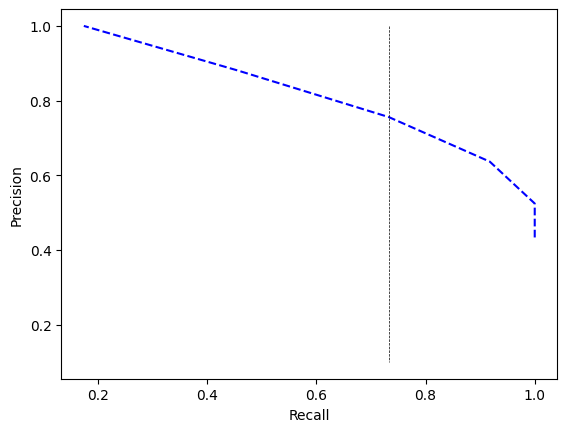

In [19]:
#Avaliando a precisão versus revocação

precisions, recalls, th = precision_recall_curve(y_train2, y_pred_proba)

plt.plot(recalls[:-1], precisions[:-1], 'b--', label = 'Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.vlines(0.733, 1, 0.1, color = 'black', linestyle = '--', linewidth = 0.5) #Linhas aleatórioas
th_73_precision = th[np.argmax(precisions >= 0.733)] # th_73_precision = 0.6
th_73_recall = th[np.argmax(precisions >= 0.733)]    # th_73_recall = 0.6

### 3.1.4) Otimização *manual* do modelo KNN (parâmetro: n_neighbors)

In [22]:
#Iteração para encontrar o melhor valor de k

resultados2 = []

for k in range(3, 25, 1):

    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(x_train, y_train2)
    y_pred = knn_model.predict(x_train)
    y_pred_proba = knn_model.predict_proba(x_train)[:, 1]

    #Limiar de decisão (threshold)
    y_train3 = y_train.copy()
    y_train3['predito'] = y_pred
    y_train3['proba'] = y_pred_proba
    th = y_train3[['predito', 'proba']].groupby('predito').min().iloc[1,0]

    #Métricas
    acuracia = round(mt.accuracy_score(y_train2, y_pred), 3)
    precisao = round(mt.precision_score(y_train2, y_pred), 3)
    recall   = round(mt.recall_score(y_train2, y_pred), 3)
    f1_score = round(mt.f1_score(y_train2, y_pred), 3)

    resultados2.append([k, th, acuracia, precisao, recall, f1_score])

df1 = pd.DataFrame(resultados2).round(2)
df1.columns = ['k', 'Limiar', 'Acurácia', 'Precisão', 'Recall', 'F1 Score']
df1

,k,Limiar,Acurácia,Precisão,Recall,F1 Score
0,3,0.67,0.83,0.81,0.80,0.80
1,4,0.75,0.78,0.85,0.61,0.71
2,5,0.60,0.78,0.76,0.73,0.74
3,6,0.67,0.76,0.79,0.60,0.68
4,7,0.57,0.76,0.73,0.69,0.71
5,8,0.62,0.74,0.76,0.59,0.66
6,9,0.56,0.74,0.71,0.67,0.69
7,10,0.60,0.73,0.74,0.58,0.65
8,11,0.55,0.73,0.70,0.65,0.68
9,12,0.58,0.72,0.73,0.57,0.64


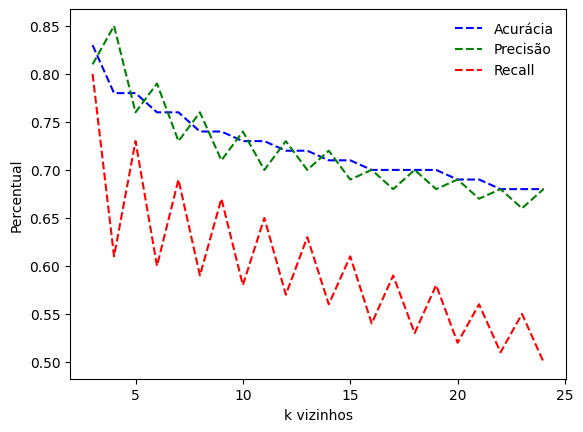

In [23]:
plt.plot(df1['k'], df1['Acurácia'], 'b--', label = 'Acurácia')
plt.plot(df1['k'], df1['Precisão'], 'g--', label = 'Precisão')
plt.plot(df1['k'], df1['Recall'], 'r--', label = 'Recall')
plt.xlabel('k vizinhos')
plt.ylabel('Percentual')
plt.legend(frameon = False)

### 3.1.5) Previsões e métricas de performance

In [25]:
##Ajuste e previsões do modelo
knn_model = KNeighborsClassifier(n_neighbors = 4)
knn_model.fit(x_train, y_train2)
#-----------------------------------------------------------------------------------------------------
y_pred1 = knn_model.predict(x_train)
y_pred2 = knn_model.predict(x_val)
y_pred3 = knn_model.predict(x_test)
y_pred_proba1 = knn_model.predict_proba(x_train)[:,1] #Threshold = 0.75 para classificação.
                                                      #O código para descobrir o limiar (similar ao da seção 3.1) não está apresentado
y_pred_proba2 = knn_model.predict_proba(x_val)[:,1]   #Threshold = 0.75 para classificação
y_pred_proba3 = knn_model.predict_proba(x_test)[:,1]  #Threshold = 0.75 para classificação
#-----------------------------------------------------------------------------------------------------
#Previsão sobre x_train e métricas
acuracia1 = round(mt.accuracy_score(y_train2, y_pred1), 3)
precisao1 = round(mt.precision_score(y_train2, y_pred1), 3)
recall1   = round(mt.recall_score(y_train2, y_pred1), 3)
f1_score1 = round(mt.f1_score(y_train2, y_pred1), 3)
roc_auc1 = round(roc_auc_score(y_train2, y_pred_proba1),2)
fpr1, tpr1, th1 = roc_curve(y_train2, y_pred_proba1)
#-----------------------------------------------------------------------------------------------------
#Previsão sobre x_val e métricas
acuracia2 = round(mt.accuracy_score(y_val2, y_pred2), 3)
precisao2 = round(mt.precision_score(y_val2, y_pred2), 3)
recall2   = round(mt.recall_score(y_val2, y_pred2), 3)
f1_score2 = round(mt.f1_score(y_val2, y_pred2), 3)
roc_auc2 = round(roc_auc_score(y_val2, y_pred_proba2),2)
fpr2, tpr2, th2 = roc_curve(y_val2, y_pred_proba2)
#-----------------------------------------------------------------------------------------------------
#Previsão sobre x_test e métricas
acuracia3 = round(mt.accuracy_score(y_test2, y_pred3), 3)
precisao3 = round(mt.precision_score(y_test2, y_pred3), 3)
recall3   = round(mt.recall_score(y_test2, y_pred3), 3)
f1_score3 = round(mt.f1_score(y_test2, y_pred3), 3)
roc_auc3 = round(roc_auc_score(y_test2, y_pred_proba3),2)
fpr3, tpr3, th3 = roc_curve(y_test2, y_pred_proba3)
#-----------------------------------------------------------------------------------------------------
df2 = pd.DataFrame.from_dict({'Previsão': ['x_train', 'x_val', 'x_test'],
                              'Acurácia': [acuracia1, acuracia2, acuracia3],
                              'Precisão': [precisao1, precisao2, precisao3],
                              'Recall':   [recall1, recall2, recall3],
                              'F1 score': [f1_score1, f1_score2, f1_score3],
                              'ROC AUC':  [roc_auc1, roc_auc2, roc_auc3]})
#-----------------------------------------------------------------------------------------------------
df2

,Previsão,Acurácia,Precisão,Recall,F1 score,ROC AUC
0,x_train,0.785,0.853,0.608,0.710,0.88
1,x_val,0.669,0.670,0.465,0.549,0.72
2,x_test,0.662,0.667,0.460,0.545,0.71


### 3.1.7) Construção da curva ROC - predições KNN

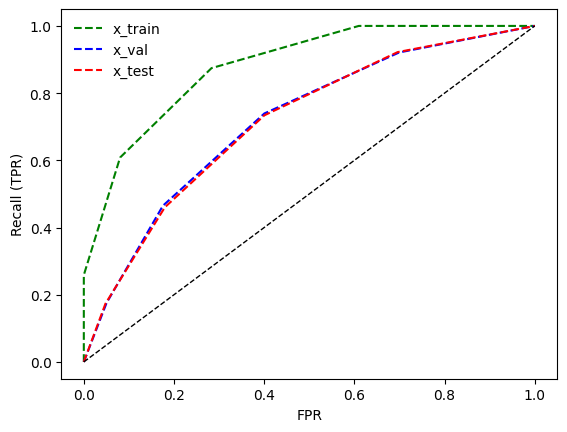

In [35]:
plt.plot(fpr1, tpr1, 'g--', label = 'x_train')
plt.plot(fpr2, tpr2, 'b--', label = 'x_val')
plt.plot(fpr3, tpr3, 'r--', label = 'x_test')
plt.plot([0,1], [0, 1], 'k--', linewidth =1) #Curva ROC de um classificador exclusivamente aleatório. 
                                             #Um bom classificador fica o mais distante possível dessa linha. Canto superior à esquerda.
                                             #Classificador perfeito terá ROC AUC (área sob a curva) igual a 1, enquanto um exclusivamente aleatório terá ROC AUC igual a 0,5.
plt.xlabel('FPR')
plt.ylabel('Recall (TPR)')
plt.legend(frameon = False)

# 4) Algoritmo SGD CLassifier

In [38]:
##Ajuste e previsões do modelo
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(x_train, y_train2)
#-----------------------------------------------------------------------------------------------------
y_pred_sgd1 = sgd_clf.predict(x_train)
y_pred_sgd2 = sgd_clf.predict(x_val)
y_pred_sgd3 = sgd_clf.predict(x_test)

y_scores1 = sgd_clf.decision_function(x_train) #Os scores são os limiares para a decisão sobre a classe - 0 ou 1
y_scores2 = sgd_clf.decision_function(x_val)
y_scores3 = sgd_clf.decision_function(x_test)
#--------------------------------------------------------------
#Previsão sobre x_train e métricas
acuracia_sgd_1 = round(mt.accuracy_score(y_train2, y_pred_sgd1),3)
precisao_sgd_1 = round(mt.precision_score(y_train2, y_pred_sgd1),3)
recall_sgd_1   = round(mt.recall_score(y_train2, y_pred_sgd1),3)
f1_score_sgd_1 = round(mt.f1_score(y_train2, y_pred_sgd1),3)
roc_auc_sgd_clf1 = round(roc_auc_score(y_train2, y_pred_sgd1),2)
fpr_sgd1, tpr_sgd1, th_sgd1 = roc_curve(y_train2, y_scores1)
#--------------------------------------------------------------
#Previsão sobre x_val e métricas
acuracia_sgd_2 = round(mt.accuracy_score(y_val2, y_pred_sgd2),3)
precisao_sgd_2 = round(mt.precision_score(y_val2, y_pred_sgd2),3)
recall_sgd_2   = round(mt.recall_score(y_val2, y_pred_sgd2),3)
f1_score_sgd_2 = round(mt.f1_score(y_val2, y_pred_sgd2),3)
roc_auc_sgd_clf2 = round(roc_auc_score(y_val2, y_pred_sgd2),2)
fpr_sgd2, tpr_sgd2, th_sgd2 = roc_curve(y_val2, y_scores2)
#--------------------------------------------------------------
#Previsão sobre x_test e métricas 
acuracia_sgd_3 = round(mt.accuracy_score(y_test2, y_pred_sgd3),3)
precisao_sgd_3 = round(mt.precision_score(y_test2, y_pred_sgd3),3)
recall_sgd_3   = round(mt.recall_score(y_test2, y_pred_sgd3),3)
f1_score_sgd_3 = round(mt.f1_score(y_test2, y_pred_sgd3),3)
roc_auc_sgd_clf3 = round(roc_auc_score(y_test2, y_pred_sgd3),2)
fpr_sgd3, tpr_sgd3, th_sgd3 = roc_curve(y_test2, y_scores3)
#--------------------------------------------------------------
df3 = pd.DataFrame.from_dict({'Previsão': ['x_train', 'x_val', 'x_test'],
                              'Acurácia': [acuracia_sgd_1, acuracia_sgd_2, acuracia_sgd_3],
                              'Precisão': [precisao_sgd_1, precisao_sgd_2, precisao_sgd_3],
                              'Recall':   [recall_sgd_1, recall_sgd_2, recall_sgd_3],
                              'F1 score': [f1_score_sgd_1, f1_score_sgd_2, f1_score_sgd_3],
                              'ROC AUC':  [roc_auc_sgd_clf1, roc_auc_sgd_clf2, roc_auc_sgd_clf3]})
#-----------------------------------------------------------------------------------------------------
df3

,Previsão,Acurácia,Precisão,Recall,F1 score,ROC AUC
0,x_train,0.568,0.661,0.007,0.014,0.5
1,x_val,0.568,0.682,0.008,0.015,0.5
2,x_test,0.563,0.742,0.008,0.016,0.5


### 4.1) Construção da curva ROC - predições SGD

Text(0, 0.5, 'Recall (TPR)')

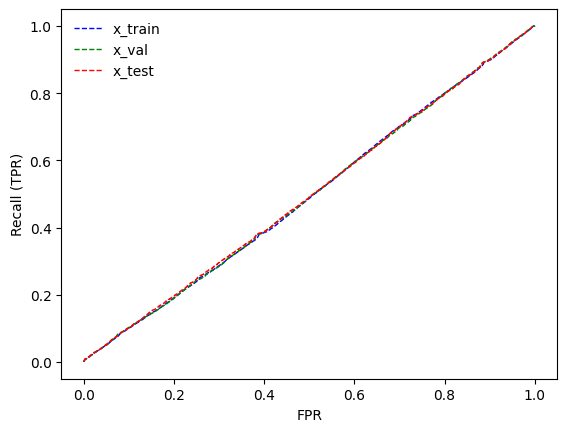

In [39]:
plt.plot(fpr_sgd1, tpr_sgd1, 'b--', linewidth = 1, label = 'x_train')
plt.plot(fpr_sgd2, tpr_sgd2, 'g--', linewidth = 1, label = 'x_val')
plt.plot(fpr_sgd3, tpr_sgd3, 'r--', linewidth = 1, label = 'x_test')
plt.legend(frameon=False)
plt.xlabel('FPR')
plt.ylabel('Recall (TPR)')

# 5) Algoritmo - DecisionTree

In [41]:
##Ajuste e previsões do modelo
decision_tree = tr.DecisionTreeClassifier()
decision_tree.fit(x_train, y_train2)
#--------------------------------------------------------
y_pred_dt1 = decision_tree.predict(x_train)
y_pred_dt2 = decision_tree.predict(x_val)
y_pred_dt3 = decision_tree.predict(x_test)

y_pred_dt1_proba = decision_tree.predict_proba(x_train)[:,1]
y_pred_dt2_proba = decision_tree.predict_proba(x_val)[:,1]
y_pred_dt3_proba = decision_tree.predict_proba(x_test)[:,1]
#--------------------------------------------------------
#Métricas - x_train
acuracia_dt1 = round(mt.accuracy_score(y_train2, y_pred_dt1), 3)
precisao_dt1 = round(mt.precision_score(y_train2, y_pred_dt1), 3)
recall_dt1   = round(mt.recall_score(y_train2, y_pred_dt1), 3)
f1_score_dt1 = round(mt.f1_score(y_train2, y_pred_dt1), 3)
roc_auc_dt1 = round(roc_auc_score(y_train2, y_pred_dt1),2)
fpr_dt1, tpr_dt1, th_dt1 = roc_curve(y_train2, y_pred_dt1_proba)
#--------------------------------------------------------
#Métricas - x_val
acuracia_dt2 = round(mt.accuracy_score(y_val2, y_pred_dt2), 3)
precisao_dt2 = round(mt.precision_score(y_val2, y_pred_dt2), 3)
recall_dt2   = round(mt.recall_score(y_val2, y_pred_dt2),3)
f1_score_dt2 = round(mt.f1_score(y_val2, y_pred_dt2), 3)
roc_auc_dt2 = round(roc_auc_score(y_val2, y_pred_dt2),2)
fpr_dt2, tpr_dt2, th_dt2 = roc_curve(y_val2, y_pred_dt2_proba)
#--------------------------------------------------------
#Métricas - x_test
acuracia_dt3 = round(mt.accuracy_score(y_test2, y_pred_dt3), 3)
precisao_dt3 = round(mt.precision_score(y_test2, y_pred_dt3), 3)
recall_dt3   = round(mt.recall_score(y_test2, y_pred_dt3), 3)
f1_score_dt3 = round(mt.f1_score(y_test2, y_pred_dt3), 3)
roc_auc_dt3 = round(roc_auc_score(y_test2, y_pred_dt3),2)
fpr_dt3, tpr_dt3, th_dt3 = roc_curve(y_test2, y_pred_dt3_proba)
#--------------------------------------------------------------
df4 = pd.DataFrame.from_dict({'Previsão': ['x_train', 'x_val', 'x_test'],
                              'Acurácia': [acuracia_dt1, acuracia_dt2, acuracia_dt3],
                              'Precisão': [precisao_dt1, precisao_dt2, precisao_dt3],
                              'Recall':   [recall_dt1, recall_dt2, recall_dt3],
                              'F1 score': [f1_score_dt1, f1_score_dt2, f1_score_dt3],
                              'ROC AUC':  [roc_auc_dt1, roc_auc_dt2, roc_auc_dt3]})
#-----------------------------------------------------------------------------------------------------
df4

,Previsão,Acurácia,Precisão,Recall,F1 score,ROC AUC
0,x_train,1.000,1.000,1.000,1.000,1.00
1,x_val,0.946,0.936,0.939,0.937,0.94
2,x_test,0.945,0.935,0.940,0.938,0.94


### 5.1) Construção da curva ROC - predições Decision Tree

Text(0, 0.5, 'Recall (TPR)')

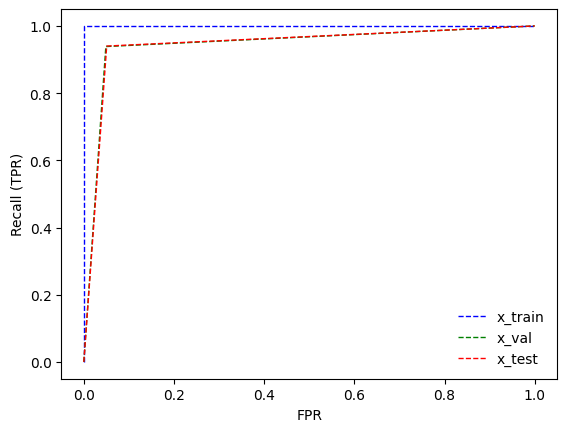

In [44]:
plt.plot(fpr_dt1, tpr_dt1, 'b--', linewidth = 1, label = 'x_train')
plt.plot(fpr_dt2, tpr_dt2, 'g--', linewidth = 1, label = 'x_val')
plt.plot(fpr_dt3, tpr_dt3, 'r--', linewidth = 1, label = 'x_test')
plt.legend(frameon=False)
plt.xlabel('FPR')
plt.ylabel('Recall (TPR)')

# 6) Algoritmo - Random Forest

In [55]:
##Ajuste e previsões do modelo
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train2)
#--------------------------------------------------------
y_pred_rf1 = random_forest.predict(x_train)
y_pred_rf2 = random_forest.predict(x_val)
y_pred_rf3 = random_forest.predict(x_test)

y_proba_rf1 = random_forest.predict_proba(x_train)[:,1]
y_proba_rf2 = random_forest.predict_proba(x_val)[:,1]
y_proba_rf3 = random_forest.predict_proba(x_test)[:,1]
#--------------------------------------------------------
#Métricas - x_train
acuracia_rf1 = round(mt.accuracy_score(y_train2, y_pred_rf1), 3)
precisao_rf1  = round(mt.precision_score(y_train2, y_pred_rf1), 3)
recall_rf1   = round(mt.recall_score(y_train2, y_pred_rf1), 3)
f1_score_rf1 = round(mt.f1_score(y_train2, y_pred_rf1), 3)
fpr_rf1, tpr_rf1, th_rf1 = roc_curve(y_train2, y_proba_rf1)
roc_auc_random_forest1 = round(roc_auc_score(y_train2, y_pred_rf1),2)
#--------------------------------------------------------
#Métricas - x_val
acuracia_rf2 = round(mt.accuracy_score(y_val2, y_pred_rf2), 3)
precisao_rf2  = round(mt.precision_score(y_val2, y_pred_rf2), 3)
recall_rf2   = round(mt.recall_score(y_val2, y_pred_rf2),3)
f1_score_rf2 = round(mt.f1_score(y_val2, y_pred_rf2), 3)
fpr_rf2, tpr_rf2, th_rf2 = roc_curve(y_val2, y_proba_rf2)
roc_auc_random_forest2 = round(roc_auc_score(y_val2, y_pred_rf2),2)
#--------------------------------------------------------
#Métricas - x_test
acuracia_rf3 = round(mt.accuracy_score(y_test2, y_pred_rf3), 3)
precisao_rf3  = round(mt.precision_score(y_test2, y_pred_rf3), 3)
recall_rf3   = round(mt.recall_score(y_test2, y_pred_rf3), 3)
f1_score_rf3 = round(mt.f1_score(y_test2, y_pred_rf3), 3)
fpr_rf3, tpr_rf3, th_rf3 = roc_curve(y_test2, y_proba_rf3)
roc_auc_random_forest3 = round(roc_auc_score(y_test2, y_pred_rf3),2)
#--------------------------------------------------------
df5 = pd.DataFrame.from_dict({'Previsão': ['x_train', 'x_val', 'x_test'],
                              'Acurácia': [acuracia_rf1, acuracia_rf2, acuracia_rf3],
                              'Precisão': [precisao_rf1, precisao_rf2, precisao_rf3],
                              'Recall':   [recall_rf1, recall_rf2, recall_rf3],
                              'F1 score': [f1_score_rf1, f1_score_rf2, f1_score_rf3],
                              'ROC AUC':  [roc_auc_random_forest1, roc_auc_random_forest2, roc_auc_random_forest3]})
#-----------------------------------------------------------------------------------------------------
df5

,Previsão,Acurácia,Precisão,Recall,F1 score,ROC AUC
0,x_train,1.000,1.000,1.000,1.000,1.00
1,x_val,0.964,0.974,0.943,0.958,0.96
2,x_test,0.964,0.972,0.944,0.958,0.96


### 6.1) Construção da curva ROC - predições Random Forest

Text(0, 0.5, 'Recall (TPR)')

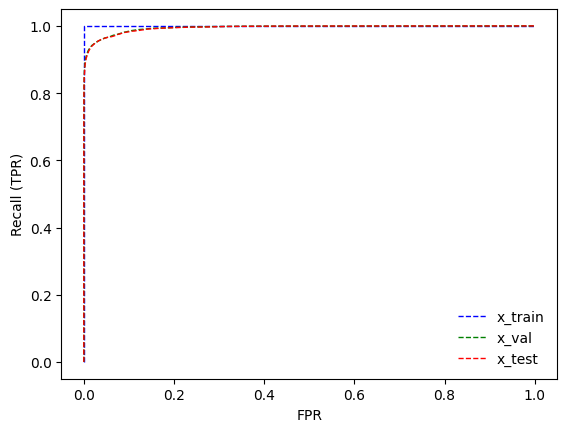

In [58]:
plt.plot(fpr_rf1, tpr_rf1, 'b--', linewidth = 1, label = 'x_train')
plt.plot(fpr_rf2, tpr_rf2, 'g--', linewidth = 1, label = 'x_val')
plt.plot(fpr_rf3, tpr_rf3, 'r--', linewidth = 1, label = 'x_test')
plt.legend(frameon=False)
plt.xlabel('FPR')
plt.ylabel('Recall (TPR)')

# 7) Algoritmo - Logistic Regression

In [61]:
##Ajuste e previsões do modelo
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train2)
#--------------------------------------------------------
y_pred_lr1 = logistic_regression.predict(x_train)
y_pred_lr2 = logistic_regression.predict(x_val)
y_pred_lr3 = logistic_regression.predict(x_test)

y_proba_lr1 = logistic_regression.predict_proba(x_train)[:,1]
y_proba_lr2 = logistic_regression.predict_proba(x_val)[:,1]
y_proba_lr3 = logistic_regression.predict_proba(x_test)[:,1]

In [66]:
#Métricas - x_train
acuracia_lr1 = round(mt.accuracy_score(y_train2, y_pred_lr1), 3)
precisao_lr1  = round(mt.precision_score(y_train2, y_pred_lr1), 3)
recall_lr1   = round(mt.recall_score(y_train2, y_pred_lr1), 3)
f1_score_lr1 = round(mt.f1_score(y_train2, y_pred_lr1), 3)
roc_auc_lr1 = round(roc_auc_score(y_train2, y_pred_lr1),2)
fpr_lr1, tpr_lr1, th_lr1 = roc_curve(y_train2, y_proba_lr1)
#--------------------------------------------------------
#Métricas - x_val
acuracia_lr2 = round(mt.accuracy_score(y_val2, y_pred_lr2), 3)
precisao_lr2  = round(mt.precision_score(y_val2, y_pred_lr2), 3)
recall_lr2   = round(mt.recall_score(y_val2, y_pred_lr2),3)
f1_score_lr2 = round(mt.f1_score(y_val2, y_pred_lr2), 3)
roc_auc_lr2 = round(roc_auc_score(y_val2, y_pred_lr2),2)
fpr_lr2, tpr_lr2, th_lr2 = roc_curve(y_val2, y_proba_lr2)
#--------------------------------------------------------
#Métricas - x_test
acuracia_lr3 = round(mt.accuracy_score(y_test2, y_pred_lr3), 3)
precisao_lr3  = round(mt.precision_score(y_test2, y_pred_lr3), 3)
recall_lr3   = round(mt.recall_score(y_test2, y_pred_lr3), 3)
f1_score_lr3 = round(mt.f1_score(y_test2, y_pred_lr3), 3)
roc_auc_lr3 = round(roc_auc_score(y_test2, y_pred_lr3),2)
fpr_lr3, tpr_lr3, th_lr3 = roc_curve(y_test2, y_proba_lr3)
#--------------------------------------------------------
df6 = pd.DataFrame.from_dict({'Previsão': ['x_train', 'x_val', 'x_test'],
                              'Acurácia': [acuracia_lr1, acuracia_lr2, acuracia_lr3],
                              'Precisão': [precisao_lr1, precisao_lr2, precisao_lr3],
                              'Recall':   [recall_lr1, recall_lr2, recall_lr3],
                              'F1 score': [f1_score_lr1, f1_score_lr2, f1_score_lr3],
                              'ROC AUC':  [roc_auc_lr1, roc_auc_lr2, roc_auc_lr3]})
#-----------------------------------------------------------------------------------------------------
df6

,Previsão,Acurácia,Precisão,Recall,F1 score,ROC AUC
0,x_train,0.873,0.861,0.842,0.851,0.87
1,x_val,0.870,0.860,0.836,0.848,0.87
2,x_test,0.869,0.860,0.838,0.849,0.87


### 7.1) Construção da curva ROC - predições Logistic Regression

Text(0, 0.5, 'Recall (TPR)')

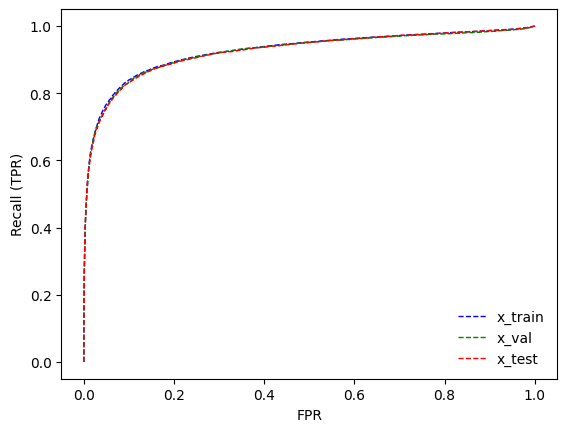

In [64]:
plt.plot(fpr_lr1, tpr_lr1, 'b--', linewidth = 1, label = 'x_train')
plt.plot(fpr_lr2, tpr_lr2, 'g--', linewidth = 1, label = 'x_val')
plt.plot(fpr_lr3, tpr_lr3, 'r--', linewidth = 1, label = 'x_test')
plt.legend(frameon=False)
plt.xlabel('FPR')
plt.ylabel('Recall (TPR)')

# 10) Quadro Resumo das Métricas de Avaliação

In [68]:
quadro = pd.DataFrame.from_dict({'Modelo': ['KNN', 'SGD', 'DecisionTree', 'RandomForest', 'LogisticRegression'],
                                 'Previsão': ['x_test', 'x_test', 'x_test','x_test','x_test'],
                                 'Acurácia': [acuracia3, acuracia_sgd_3, acuracia_dt3, acuracia_rf3, acuracia_lr3],
                                 'Precisão': [precisao3, precisao_sgd_3, precisao_dt3, precisao_rf3, precisao_lr3],
                                 'Recall':   [recall3, recall_sgd_3, recall_dt3, recall_rf3, recall_lr3],
                                 'F1 Score': [f1_score3, f1_score_sgd_3, f1_score_dt3, f1_score_rf3, f1_score_lr3],
                                 'ROC AUC': [roc_auc3, roc_auc_sgd_clf3, roc_auc_dt3, roc_auc_random_forest3, roc_auc_lr3]
                                })
quadro

,Modelo,Previsão,Acurácia,Precisão,Recall,F1 Score,ROC AUC
0,KNN,x_test,0.662,0.667,0.460,0.545,0.71
1,SGD,x_test,0.563,0.742,0.008,0.016,0.50
2,DecisionTree,x_test,0.945,0.935,0.940,0.938,0.94
3,RandomForest,x_test,0.964,0.972,0.944,0.958,0.87
4,LogisticRegression,x_test,0.869,0.860,0.838,0.849,0.87


# 11) Comparativo das Curvas ROC - diferentes algoritmos

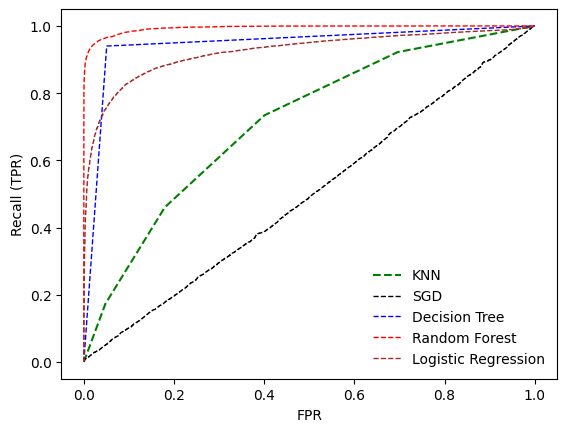

In [69]:
plt.plot(fpr3, tpr3, 'g--', label = 'KNN')
plt.plot(fpr_sgd3, tpr_sgd3, '--', color = 'black', linewidth = 1, label = 'SGD')
plt.plot(fpr_dt3, tpr_dt3, 'b--', linewidth = 1, label = 'Decision Tree')
plt.plot(fpr_rf3, tpr_rf3, 'r--', linewidth = 1, label = 'Random Forest')
plt.plot(fpr_lr3, tpr_lr3, '--', color = 'brown', linewidth = 1, label = 'Logistic Regression')
plt.xlabel('FPR')
plt.ylabel('Recall (TPR)')

plt.legend(frameon = False)